In [2]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

In [3]:
def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()



In [4]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [5]:
X = np.array(range(3))
polynomials(X, 3)

array([[0, 0, 0],
       [1, 1, 1],
       [2, 4, 8]])

In [6]:
polynomials(X, 10)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024]])

In [7]:
def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

In [8]:
#skips intermediate steps and gives last column
monomials(X, 3)

array([[0],
       [1],
       [8]])

In [9]:
def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)
data

[(0.15066003250989457, 4.654693010921157),
 (0.20984996508725073, 4.892481287265068),
 (0.2651972069316564, 5.069182686240605),
 (0.30102847288117385, 5.340329016118073),
 (0.40294566352439887, 5.780673463357801),
 (0.5562915362717715, 5.936349709382764),
 (0.6561294895117069, 5.9797699602529875),
 (0.7203567871062648, 6.077601732546531),
 (1.0372727705886842, 5.968697481880566),
 (1.3084007372330484, 5.624220548982676),
 (1.4238575762029682, 5.381217839954291),
 (1.4416332335889885, 5.192075415925588),
 (1.4658377418612012, 5.300440823271076),
 (1.5907772931356072, 4.678888955069287),
 (1.6783389763734804, 4.29906247553727),
 (1.761627466751497, 4.1144989598572606),
 (1.7978810870861988, 3.7451068406228067),
 (1.807594147682734, 3.8276429888792984),
 (1.9310186854636648, 3.1498736632948177),
 (1.958004877401774, 3.044366685518837)]

Fitting Polynomial Functions:


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     33.50
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.41e-05
Time:                        10:45:15   Log-Likelihood:                -50.355
No. Observations:                  20   AIC:                             102.7
Df Residuals:                      19   BIC:                             103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.0924      0.534      5.788      0.0

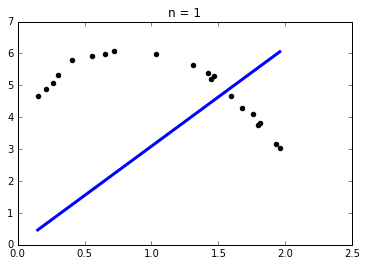

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     15.73
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           0.000827
Time:                        10:45:15   Log-Likelihood:                -54.487
No. Observations:                  20   AIC:                             111.0
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5702      0.396      3.967      0.0

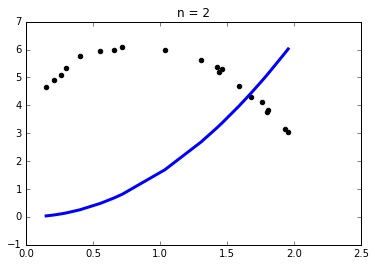

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     10.79
Date:                Wed, 12 Oct 2016   Prob (F-statistic):            0.00390
Time:                        10:45:15   Log-Likelihood:                -56.022
No. Observations:                  20   AIC:                             114.0
Df Residuals:                      19   BIC:                             115.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8037      0.245      3.285      0.0

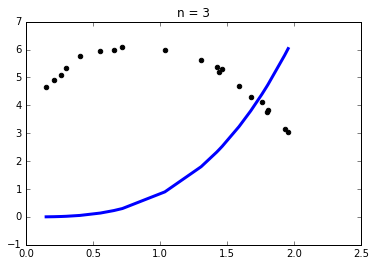

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     8.299
Date:                Wed, 12 Oct 2016   Prob (F-statistic):            0.00957
Time:                        10:45:16   Log-Likelihood:                -56.895
No. Observations:                  20   AIC:                             115.8
Df Residuals:                      19   BIC:                             116.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4109      0.143      2.881      0.0

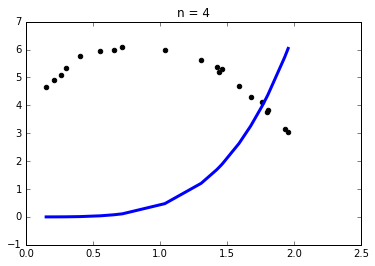

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     6.708
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0180
Time:                        10:45:16   Log-Likelihood:                -57.496
No. Observations:                  20   AIC:                             117.0
Df Residuals:                      19   BIC:                             118.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2088      0.081      2.590      0.0

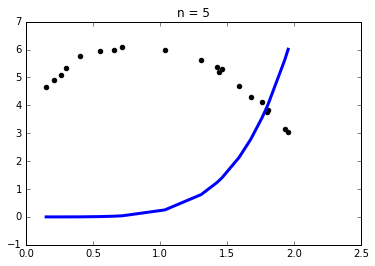

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5.581
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0290
Time:                        10:45:16   Log-Likelihood:                -57.944
No. Observations:                  20   AIC:                             117.9
Df Residuals:                      19   BIC:                             118.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1055      0.045      2.362      0.0

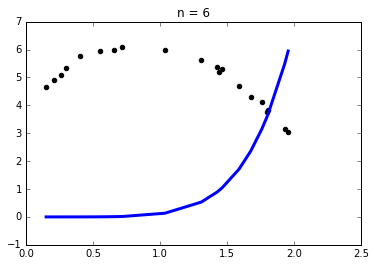

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4.743
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0422
Time:                        10:45:16   Log-Likelihood:                -58.291
No. Observations:                  20   AIC:                             118.6
Df Residuals:                      19   BIC:                             119.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0531      0.024      2.178      0.0

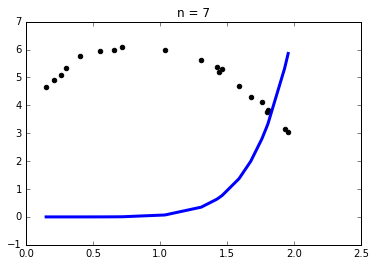

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.098
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0572
Time:                        10:45:16   Log-Likelihood:                -58.566
No. Observations:                  20   AIC:                             119.1
Df Residuals:                      19   BIC:                             120.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0266      0.013      2.024      0.0

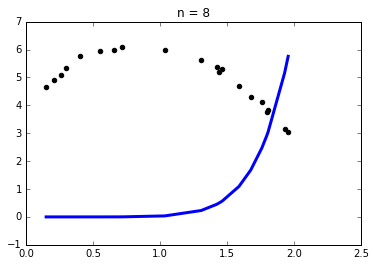

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.592
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0734
Time:                        10:45:17   Log-Likelihood:                -58.788
No. Observations:                  20   AIC:                             119.6
Df Residuals:                      19   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0134      0.007      1.895      0.0

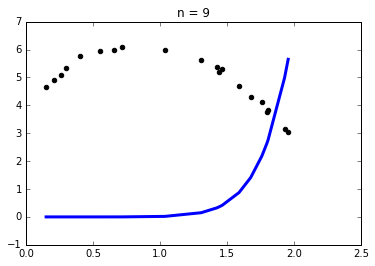

In [18]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])
#domain and Y shown
for i in range(1, 10):
    X = monomials(domain, i)
    #print (X)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())
    
     # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
     # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

In [ ]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     33.50
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.41e-05
Time:                        10:51:45   Log-Likelihood:                -50.355
No. Observations:                  20   AIC:                             102.7
Df Residuals:                      19   BIC:                             103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.0924      0.534      5.788      0.0

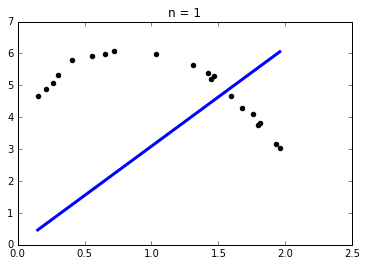

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.09e-11
Time:                        10:51:46   Log-Likelihood:                -32.471
No. Observations:                  20   AIC:                             68.94
Df Residuals:                      18   BIC:                             70.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            13.5145      1.123     12.030      0.0

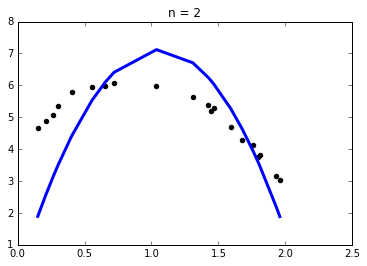

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     268.8
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.61e-14
Time:                        10:51:46   Log-Likelihood:                -21.716
No. Observations:                  20   AIC:                             49.43
Df Residuals:                      17   BIC:                             52.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            20.7921      1.438     14.455      0.0

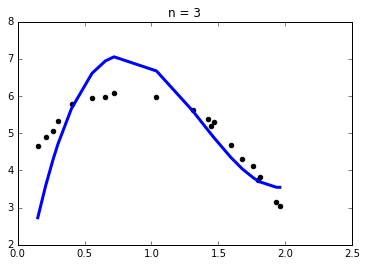

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     613.9
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.76e-17
Time:                        10:51:46   Log-Likelihood:                -10.119
No. Observations:                  20   AIC:                             28.24
Df Residuals:                      16   BIC:                             32.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            29.3349      1.665     17.616      0.0

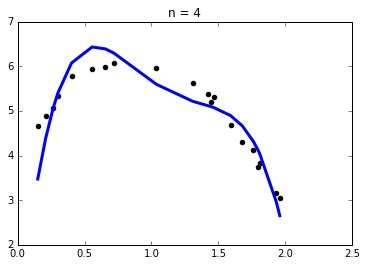

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1600.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           6.75e-20
Time:                        10:51:46   Log-Likelihood:                 2.2898
No. Observations:                  20   AIC:                             5.420
Df Residuals:                      15   BIC:                             10.40
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            36.6246      1.515     24.170      0.0

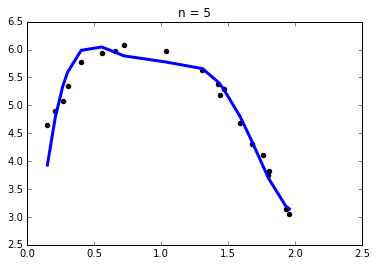

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2433.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.66e-20
Time:                        10:51:46   Log-Likelihood:                 8.9856
No. Observations:                  20   AIC:                            -5.971
Df Residuals:                      14   BIC:                          0.003256
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            42.8725      2.045     20.960      0.0

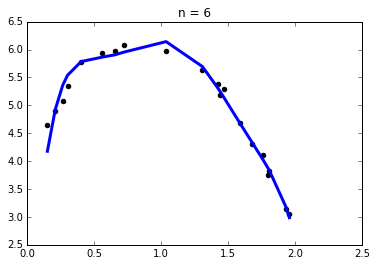

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3220.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           5.13e-20
Time:                        10:51:47   Log-Likelihood:                 14.067
No. Observations:                  20   AIC:                            -14.13
Df Residuals:                      13   BIC:                            -7.163
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            50.2939      3.018     16.664      0.0

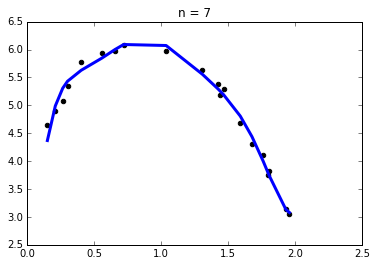

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4420.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.28e-19
Time:                        10:51:47   Log-Likelihood:                 19.368
No. Observations:                  20   AIC:                            -22.74
Df Residuals:                      12   BIC:                            -14.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            58.3382      3.677     15.866      0.0

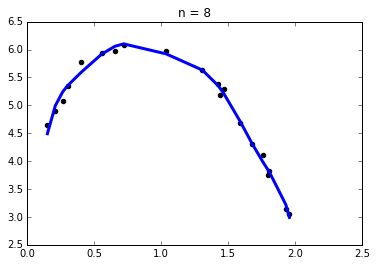

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5601.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           7.91e-19
Time:                        10:51:47   Log-Likelihood:                 23.782
No. Observations:                  20   AIC:                            -29.56
Df Residuals:                      11   BIC:                            -20.60
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            69.8095      5.572     12.529      0.0

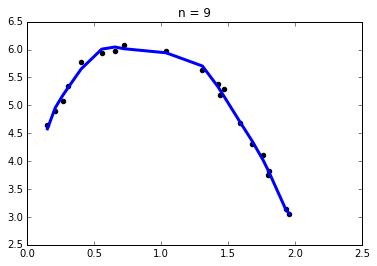

In [19]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

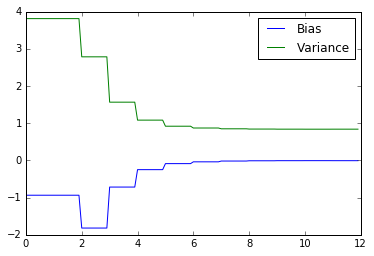

In [20]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     233.9
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.91e-12
Time:                        11:14:03   Log-Likelihood:                -16.228
No. Observations:                  20   AIC:                             34.46
Df Residuals:                      19   BIC:                             35.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8328      0.120     15.295      0.0

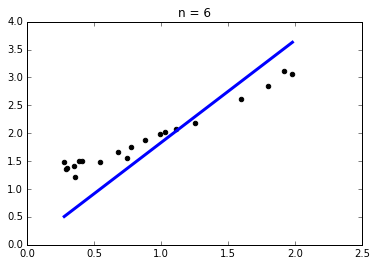

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     221.6
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           6.30e-12
Time:                        11:14:03   Log-Likelihood:                -27.671
No. Observations:                  20   AIC:                             57.34
Df Residuals:                      19   BIC:                             58.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.1876      0.214     14.885      0.0

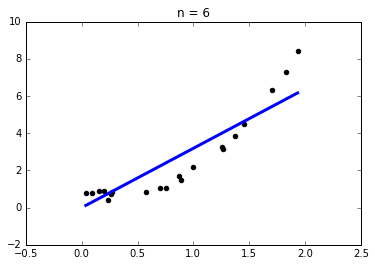

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     82.84
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.35e-08
Time:                        11:14:03   Log-Likelihood:                -48.579
No. Observations:                  20   AIC:                             99.16
Df Residuals:                      19   BIC:                             100.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             5.1083      0.561      9.101      0.0

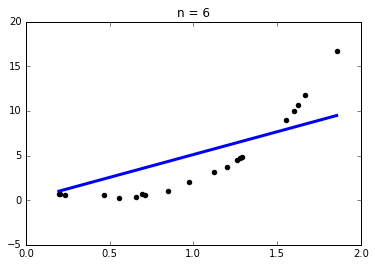

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     70.81
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           7.85e-08
Time:                        11:14:03   Log-Likelihood:                -74.430
No. Observations:                  20   AIC:                             150.9
Df Residuals:                      19   BIC:                             151.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            13.5005      1.604      8.415      0.0

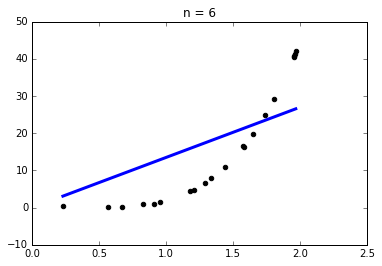

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     30.75
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.39e-05
Time:                        11:14:04   Log-Likelihood:                -88.590
No. Observations:                  20   AIC:                             179.2
Df Residuals:                      19   BIC:                             180.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            22.2396      4.010      5.546      0.0

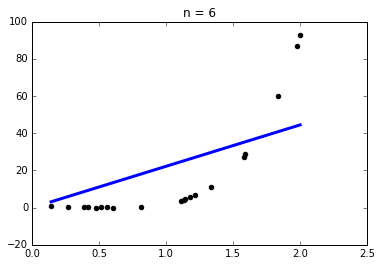

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     35.45
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           9.90e-06
Time:                        11:14:04   Log-Likelihood:                -82.569
No. Observations:                  20   AIC:                             167.1
Df Residuals:                      19   BIC:                             168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            18.2274      3.061      5.954      0.0

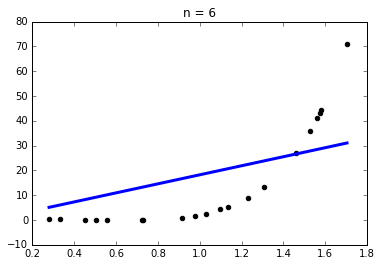

In [34]:
#practice
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
#     # Create linear regression object
    regr = sm.OLS(Y, X).fit()
    print(regr.summary())
#     # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

#     # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()
    #the higher the degree the worse the model fit

In [29]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 7):
    print(data[0])
#     X = polynomials(domain, i)
#     # Create linear regression object
#     regr = sm.OLS(Y, X).fit()

#     yhat = regr.predict(X)
#     sse = np.mean((np.mean(yhat) - Y) ** 2)
#     var = np.var(yhat)
#     bias = sse - var - 0.01
    
#     # The coefficients
#     print(regr.summary())

#     # The mean square error
#     print("Residual sum of squares: %.2f" % sse)

#     print("Bias: {bias}".format(bias=bias))
#     print("Variance: {var}".format(var=var))
        
#     # Plot outputs
#     plt.scatter(domain, Y,  color='black')
#     plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

#     plt.title("n = " + str(i))

#     plt.show()

(0.01007327256921231, 1.017741967855826)
(0.01007327256921231, 1.017741967855826)
(0.01007327256921231, 1.017741967855826)
(0.01007327256921231, 1.017741967855826)
(0.01007327256921231, 1.017741967855826)
(0.01007327256921231, 1.017741967855826)
